In [1]:
# import all needed packages
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

## Case study: Multiple linear regression with the Carseats dataset

In this case study we investigate the Carseats dataset. This is a simulated data set containing sales of child car seats at 400 different stores. It contains the following variables: 

- `Sales`: Unit sales (in thousands) at each location

- `CompPrice`: Price charged by competitor at each location

- `Income`: Community income level (in thousands of dollars)

- `Advertising`: Local advertising budget for company at each location (in thousands of dollars)

- `Population`: Population size in region (in thousands)

- `Price`: Price company charges for car seats at each site

- `ShelveLoc`: A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

- `Age`: Average age of the local population

- `Education`: Education level at each location

- `Urban`: A factor with levels No and Yes to indicate whether the store is in an urban or rural location

- `US`: A factor with levels No and Yes to indicate whether the store is in the US or not

In [2]:
# run this cell to load the data
Carseats = load_data('Carseats')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


### Task 1:
Perform a basic exploratory data analysis. As an orientation, the following structure might be helpful:
1. Understand the structure (check dimensions (number of rows/columns), display column names, check data types and missing values)
2. Get summary statistics (use .describe() for numerical features, use .value_counts() for categorical variables)
3. Visualize distributions (histograms for numeric variables (e.g., Price, Sales), boxplots for comparing variables (e.g., Sales by ShelveLoc))
4. Explore relationships (correlation matrix for numeric features, pairwise scatterplots, grouped bar plots for categorical relationships)

In [3]:
# 1. Inspect structure
print("Shape:", Carseats.shape)
print("\nColumns:", Carseats.columns.tolist())
print("\nInfo:")
print(Carseats.info())
print("\nMissing values:\n", Carseats.isnull().sum())

Shape: (400, 11)

Columns: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB
None

Missing values:
 Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price      

In [4]:
# 2. Summary statistics
print("\nSummary statistics (numerical):")
print(Carseats.describe())

print("\nShelveLoc value counts:")
print(Carseats['ShelveLoc'].value_counts())
print("\nUrban value counts:")
print(Carseats['Urban'].value_counts())
print("\nUS value counts:")
print(Carseats['US'].value_counts())


Summary statistics (numerical):
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.00000

/opt/tljh/user/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


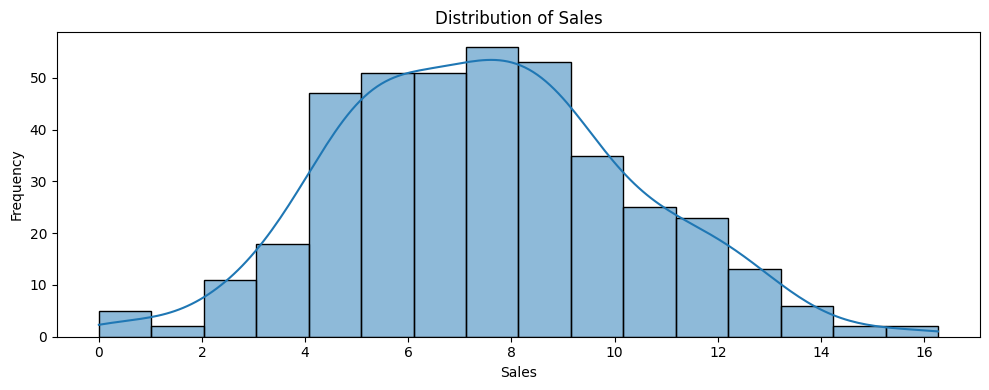

In [5]:
# 3. Visualize distributions
plt.figure(figsize=(10, 4))
sns.histplot(Carseats['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

/opt/tljh/user/lib/python3.9/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


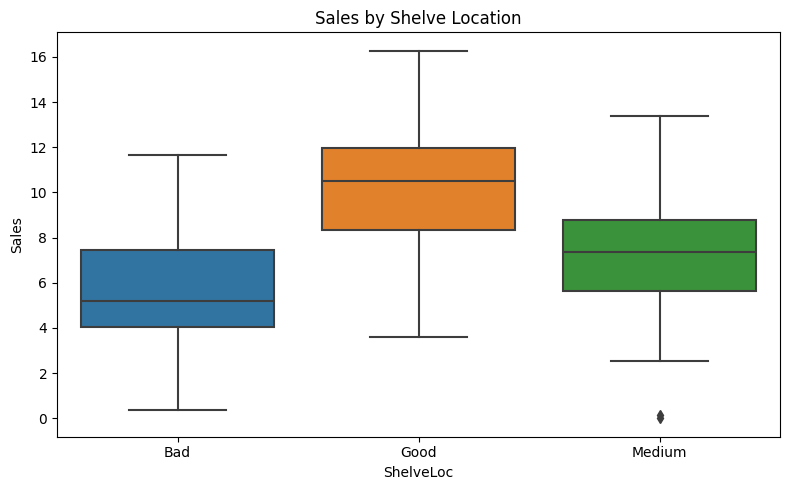

In [6]:
# Boxplot: Sales by Shelve Location
plt.figure(figsize=(8, 5))
sns.boxplot(data=Carseats, x='ShelveLoc', y='Sales')
plt.title('Sales by Shelve Location')
plt.tight_layout()
plt.show()

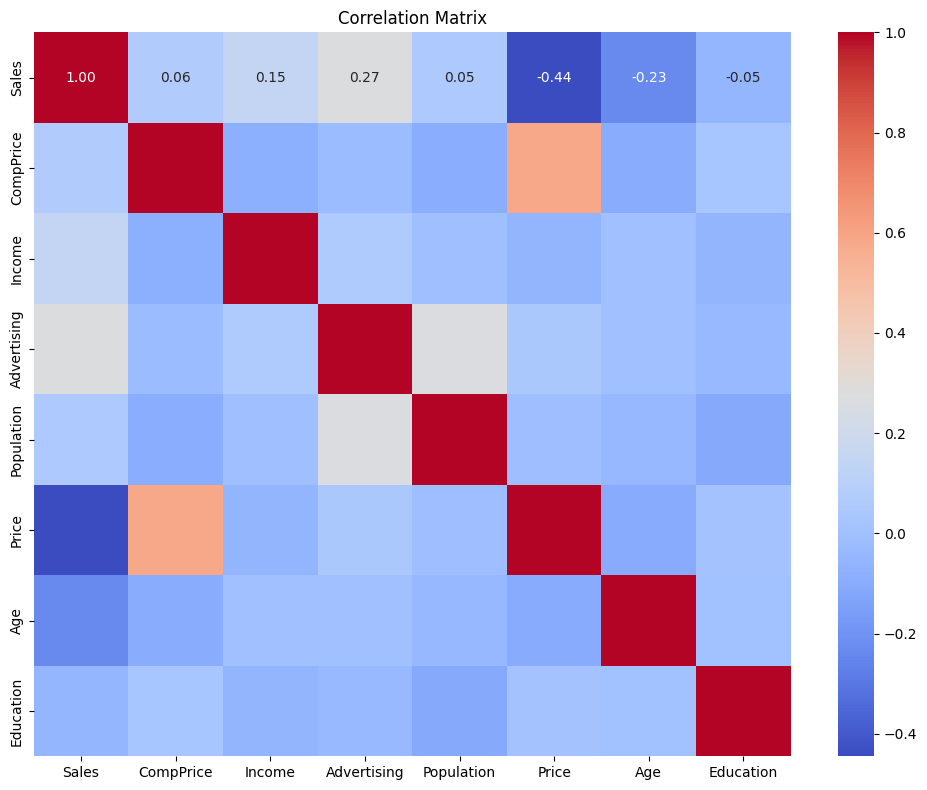

In [7]:
# 4. Correlation matrix
plt.figure(figsize=(10, 8))
corr = Carseats.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

/opt/tljh/user/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/tljh/user/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/tljh/user/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/tljh/user/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

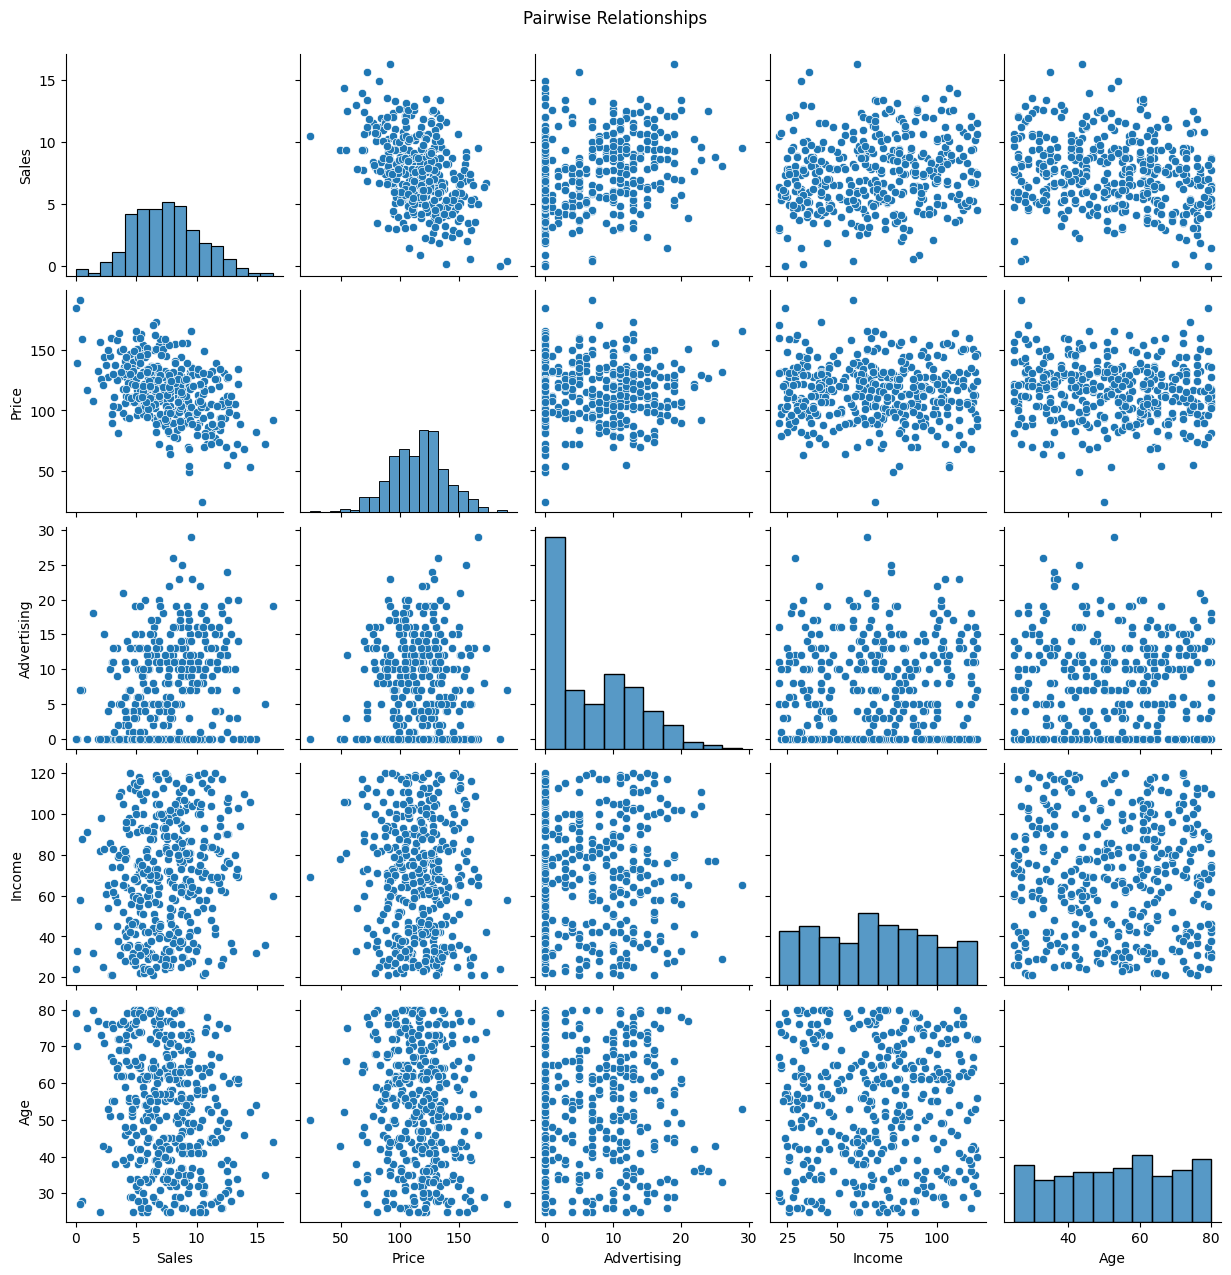

In [8]:
subset = Carseats[['Sales', 'Price', 'Advertising', 'Income', 'Age']]
sns.pairplot(subset)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

#### Key Insights from EDA on Carseats Dataset

- The dataset contains 400 observations and 11 variables (mix of numeric and categorical).
- `Sales` is the response variable, and its distribution is roughly normal but slightly skewed.
- `ShelveLoc` (quality of shelf location) has three levels: Bad, Medium, and Good.
  - Sales tend to be higher for better shelf locations (clear from boxplots).
- `Price`, `Advertising`, and `Age` are numeric predictors with varying correlations to `Sales`.
  - `Price` has a **negative** correlation with `Sales` — higher prices tend to reduce sales.
  - `Advertising` has a **positive** correlation with `Sales`.
  - `Age` also shows some correlation with `Sales`, possibly non-linear.
- The `correlation matrix` shows multicollinearity is not a major concern.
- No major missing values are present in the dataset.
- Categorical variables like `Urban` and `US` are balanced and should be encoded as dummies for modeling.
- Pair plots suggest linear relationships between some numeric predictors and `Sales`, though interactions or non-linear terms may improve model performance.

## Task 2:
Fit a multiple regression model to predict `Sales` using `Price`, `Urban`, and `US`.

In [10]:
# solution
predictors = ['Price', 'Urban', 'US']
X = MS(predictors).fit_transform(Carseats)
X

/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/

,intercept,Price,Urban[Yes],US[Yes]
0,1.0,120,1.0,1.0
1,1.0,83,1.0,1.0
2,1.0,80,1.0,1.0
3,1.0,97,1.0,1.0
4,1.0,128,1.0,0.0
...,...,...,...,...
395,1.0,128,1.0,1.0
396,1.0,120,0.0,1.0
397,1.0,159,1.0,1.0
398,1.0,95,1.0,1.0


In [11]:
y = Carseats['Sales']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.39e-23
Time:                        21:30:46   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Task 3: 
Write out the model in equation form, being careful to handle the qualitative variables properly.

*Solution*:

The model is given by
$$\texttt{Sales} = 13.0435 -0.0545 \cdot \texttt{Price} -0.0219 \cdot \texttt{Urban} + 1.2006 \cdot \texttt{US}.$$ 

We observe:
- The model indicates that there is a negative relationship between the Sales volume and the competitor's price, i.e. the higher the local competitor's price, the lower the overall sales level.
- If the store is in an urban area, this seems to have a slightly negative effect on sales. This is not a reliable statement though as the $p$-value of `Urban` is too high to take `Urban` as a reliable predictor.
- The variable `US` seems to have a positive effect on the `Sales` level.

## Task 4:
For which of the predictors can you reject the null hypothesis $H_0: \beta_j = 0$?

*Solution*:
For `Price` and `US` the null hypothesis can be rejected, for `Urban` not.

## Task 5:
On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [12]:
# Solution:
X = MS(['Price', 'US']).fit_transform(Carseats)
y = Carseats['Sales']
model = sm.OLS(y,X).fit()
model.summary()

/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/python3.9/site-packages/ISLP/models/columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
/opt/tljh/user/lib/

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.66e-24
Time:                        21:30:48   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Task 6:
How well do the models from Task 2 and Task 5 fit the data?

*Solution*:

We can compare the $R^2$ of both models. In both models, the coefficient is $0.239$. Appearently, the model of Task 5 is a better model as it achieves the same $R^2$ with less predictors. However, both models do not fit the data greatly.